# 🌍 CO2 Emissions Estimation from Vehicle Specs

This notebook demonstrates how to predict vehicle CO2 emissions using features like engine size, fuel consumption, and fuel type. We use a regression model (Random Forest) with feature scaling and categorical encoding.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


## 📂 Load Dataset

In [2]:
# Update path as needed
df = pd.read_csv("co2_emissions.csv")
df.head()

,EngineSize,Cylinders,FuelConsumption_City,FuelConsumption_Hwy,FuelConsumption_Comb,FuelType,CO2Emissions
0,3.496714,8,10.281772,7.876213,9.078993,D,244.550026
1,2.861736,4,6.463121,5.282726,5.872924,D,142.914393
2,3.647689,8,10.646335,8.175591,9.410963,E,273.276288
3,4.523030,4,9.704795,7.952060,8.828427,D,233.516884
4,2.765847,8,9.067927,7.009143,8.038535,D,208.244289


## 🧾 Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EngineSize            1000 non-null   float64
 1   Cylinders             1000 non-null   int64  
 2   FuelConsumption_City  1000 non-null   float64
 3   FuelConsumption_Hwy   1000 non-null   float64
 4   FuelConsumption_Comb  1000 non-null   float64
 5   FuelType              1000 non-null   object 
 6   CO2Emissions          1000 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 54.8+ KB


In [4]:
df.describe()

,EngineSize,Cylinders,FuelConsumption_City,FuelConsumption_Hwy,FuelConsumption_Comb,CO2Emissions
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.024286,5.952000,10.023838,8.005986,9.014912,239.546994
std,0.965064,1.617502,1.954583,1.575249,1.757057,38.866172
min,1.000000,4.000000,3.960976,3.122123,3.639711,126.278615
25%,2.352410,4.000000,8.715995,6.956021,7.827386,213.196984
50%,3.025301,6.000000,10.001733,7.975625,8.985742,239.627264
75%,3.647944,8.000000,11.343297,9.048248,10.154480,266.086918
max,6.500000,8.000000,16.386215,13.673969,14.946903,360.162385


## 📊 Data Visualization and Correlations

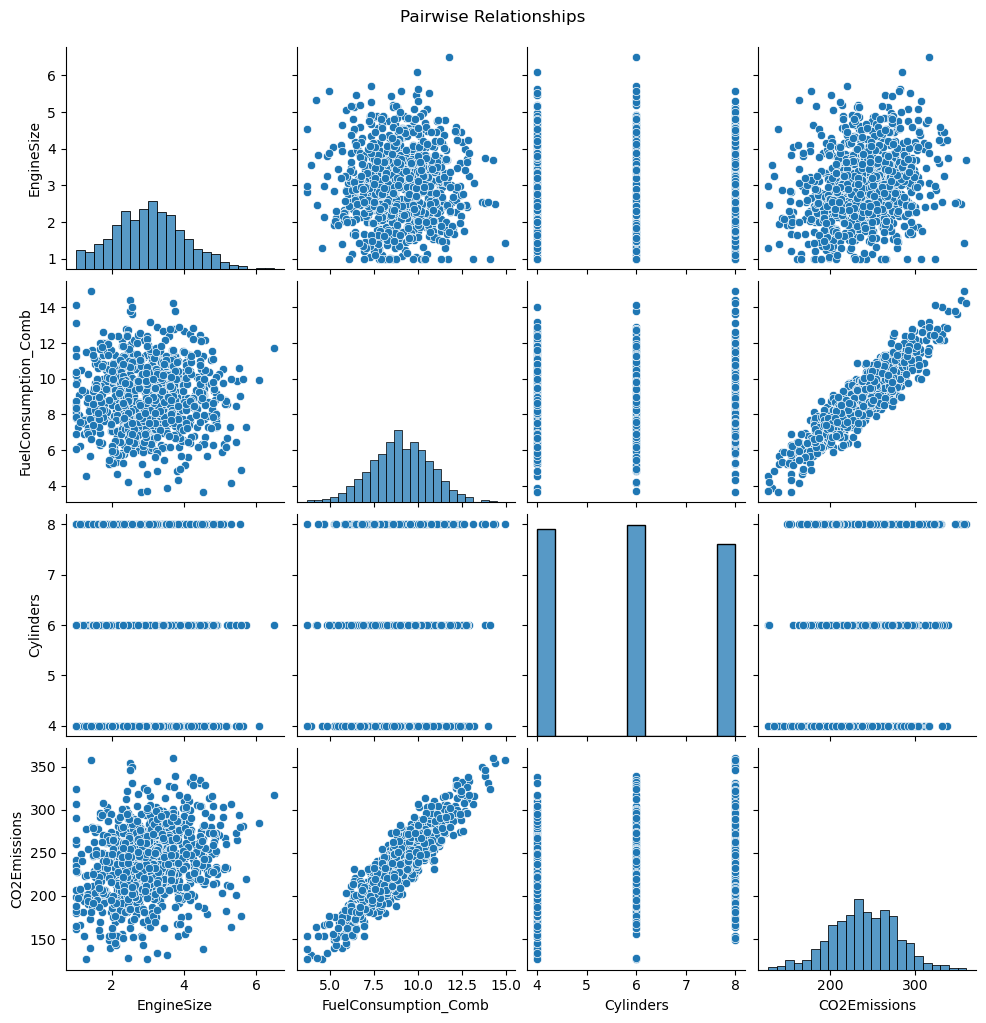

In [5]:
sns.pairplot(df[['EngineSize', 'FuelConsumption_Comb', 'Cylinders', 'CO2Emissions']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

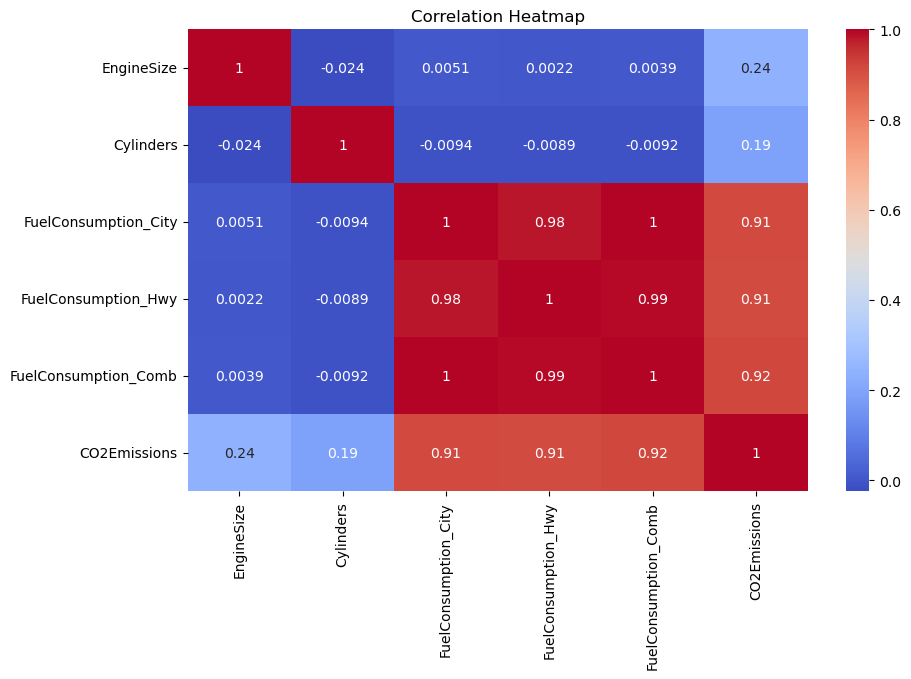

In [7]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 🛠️ Feature and Target Separation

In [8]:
X = df.drop(columns=["CO2Emissions"])
y = df["CO2Emissions"]

numeric_features = ["EngineSize", "Cylinders", "FuelConsumption_City", "FuelConsumption_Hwy", "FuelConsumption_Comb"]
categorical_features = ["FuelType"]


## 🔀 Train/Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 Model Training: Random Forest Regressor

In [10]:

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(), categorical_features)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


## 📈 Model Evaluation

In [11]:

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 8.26
RMSE: 10.54
R² Score: 0.91


## 🧪 Actual vs Predicted CO2 Emissions

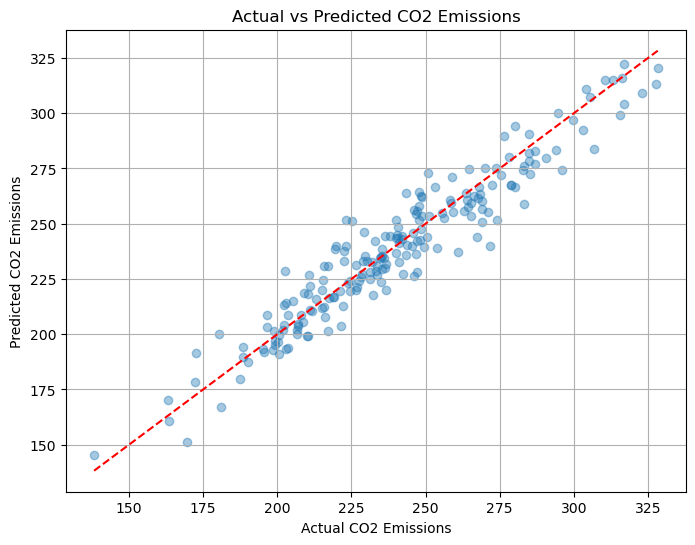

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.grid(True)
plt.show()
